# Data-Driven Marketing Strategies To Boost Mall Sales With Unsupervised Learning
---
Author: Makinde Oluwasegunegun Israel

---

# **The data**

The dataset contains information about mall customers, including their gender, age, annual income (in thousands of dollars), and spending score. Each row in the dataset represents a unique customer, identified by a CustomerID. The data was collected from a survey for marketing and customer segmentation purposes.

'https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/unsupervised_sprint/mall_customers.csv

# **Aim of analysis**

- The primary objective of this analysis is to segment the customers based on their annual income and spending scores using K-means and hierarchical clustering.

- I aim to identify distinct groups of customers with similar spending behaviours and income levels.

- This segmentation will help in targeted marketing strategies, understanding customer preferences, and improving overall customer satisfaction and retention.



# **Insights & Recommendations from analysis for  Mall Sales Improvement**


In [ ]:
cluster_summary

,Annual_Income_(k$),Spending_Score
cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


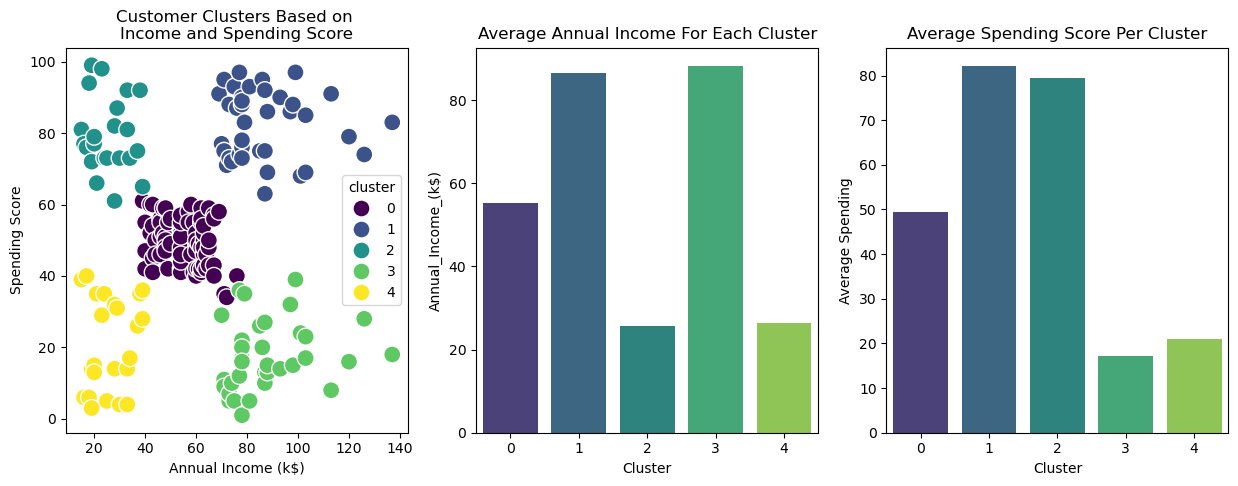

In [ ]:
# @title
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].set_xlabel("Annual Income (k$)")
axes[0].set_ylabel("Spending Score")
axes[0].set_title("Customer Clusters Based on \nIncome and Spending Score")
axes[0].legend(title="Cluster")
sns.scatterplot(data=X, x="Annual_Income_(k$)", y="Spending_Score", hue="cluster", palette="viridis", s=150, ax=axes[0])

cluster_summary = X.groupby("cluster").agg("mean").reset_index()
sns.barplot(data=cluster_summary, x="cluster", y="Annual_Income_(k$)", palette="viridis", ax=axes[1])
axes[1].set_xlabel("Cluster")
axes[1].set_ylabel("Annual_Income_(k$)")
axes[1].set_title("Average Annual Income For Each Cluster")

sns.barplot(data=cluster_summary, x="cluster", y="Spending_Score", palette="viridis", label=cluster, ax=axes[2])
axes[2].set_xlabel("Cluster")
axes[2].set_ylabel("Average Spending")
axes[2].set_title("Average Spending Score Per Cluster")



plt.show()

**CLUSTER 0 (Mid Income, Average Spending) – Price-Conscious Consumers**

---
Insights:

- This group has moderate incomes (55K dollars) but spends at an average level (49K dollars)
- They likely budget their spending and look for value-for-money deals.
---
Marketing Strategy:

- Introduce seasonal discounts, bundle deals, and cashback rewards.
- Market mid-range brands and emphasize quality at reasonable prices.
- Use email marketing with special discounts to drive repeat purchases.



**CLUSTER 1 (High Income, High Spending) – VIP**

---
Insights
- Customers in this group have high annual incomes (86K dollars) and high spending scores (82K dollars).
- They are likely loyal and premium customers willing to spend on luxury products and exclusive experiences.
---
Marketing Strategy:
- Offer exclusive memberships, VIP discounts, and loyalty programs.
- Promote luxury brands, personalized shopping experiences, and premium customer service.
- Provide personal shopping assistants and exclusive deals to retain them.
---





**CLUSTER 2 (Low Income, High Spending) – Impulse Buyers**


---


Insights:

- Despite having low incomes (25K dollars), this group spends a lot (79K dollars).
- They prioritize experiences, lifestyle, and instant gratification over savings.


---


Marketing Strategy:
- Promote buy-now-pay-later (BNPL) options or installment plans.
- Offer low-cost but high-perceived value products.
- Create loyalty programs with cashback incentives.

**CLUSTER 3 (High Income, Low Spending) – Potential Upsell Group**

---

Insights:

- Customers here earn the most (88K dollars) but spend the least (17K dollars).
- They might be saving-oriented, skeptical, or not finding appealing offers.


---


Marketing Strategy:

- Use targeted promotions and personalized recommendations to encourage spending.
- Offer premium loyalty rewards for more engagement.
- Enhance the shopping experience with better ambiance, events, and customer engagement.

**CLUSTER 4 (Low Income, Low Spending) – Budget-Conscious Buyers**


---


Insights:

- This group has low incomes (26K dollars) and low spending (20K dollars).
- They may be students, bargain hunters, or price-sensitive shoppers.


---


Marketing Strategy:
- Focus on budget-friendly brands and promotions.
- Use flash sales, discount coupons, and bulk purchase incentives.
- Implement referral discounts to bring in more shoppers.

---

---

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

data = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/unsupervised_sprint/mall_customers.csv', index_col=0)
data

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [ ]:
df = data.copy()

#### Summary Statistics

In [ ]:
print(data.describe())
data.shape

              Age  Annual_Income_(k$)  Spending_Score
count  200.000000          200.000000      200.000000
mean    38.850000           60.560000       50.200000
std     13.969007           26.264721       25.823522
min     18.000000           15.000000        1.000000
25%     28.750000           41.500000       34.750000
50%     36.000000           61.500000       50.000000
75%     49.000000           78.000000       73.000000
max     70.000000          137.000000       99.000000


(200, 4)

In [ ]:
data.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

                         Age  Annual_Income_(k$)  Spending_Score
Age                 1.000000           -0.012398       -0.327227
Annual_Income_(k$) -0.012398            1.000000        0.009903
Spending_Score     -0.327227            0.009903        1.000000


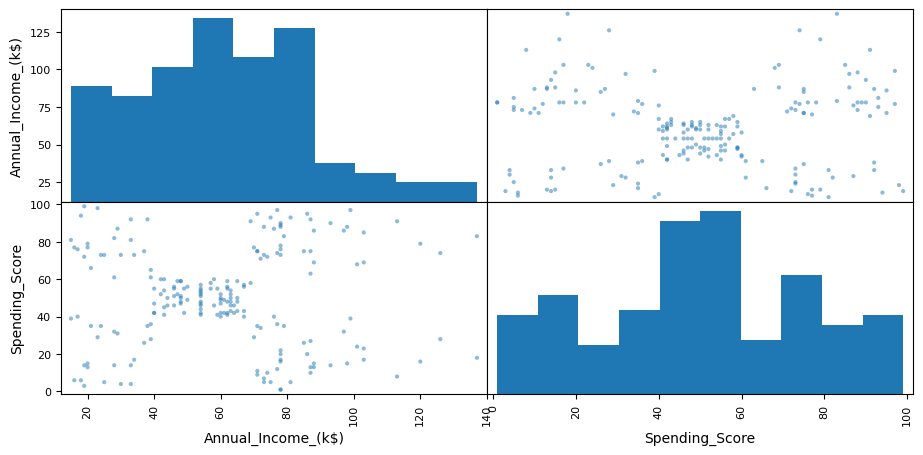

In [ ]:
print(data.select_dtypes(exclude='O').corr())
pd.plotting.scatter_matrix(data[["Annual_Income_(k$)", "Spending_Score"]], figsize=(11,5));

##### Interpretation
The relationship between annual income and spending score shows that:
- There are visible 5 clusters forming, particularly in the center of the plot.

#### Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = data[["Annual_Income_(k$)", "Spending_Score"]]
X_scaled = ss.fit_transform(X)

#### Finding the best k value for  K-Means model

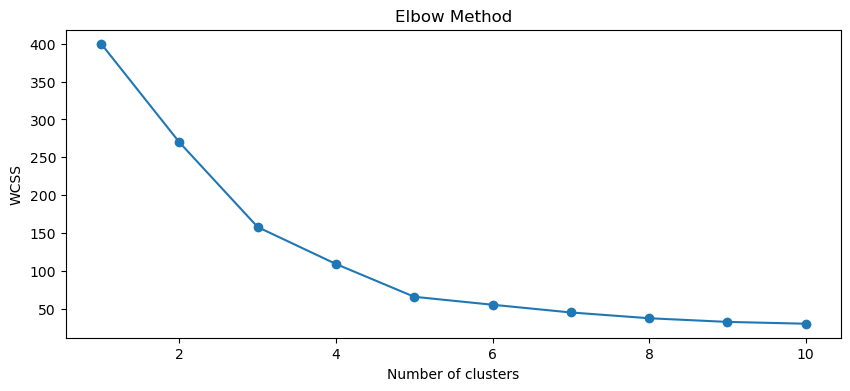

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

figure = plt.figure(figsize=(10, 4))
plt.plot(range(1, 11), wcss)
plt.scatter(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

##### Interpretation
The dataset is best clustered at 5

#### Building and Evaluating  K-Means Model with k=5

In [ ]:
from sklearn.metrics import silhouette_score
kmean = KMeans(n_clusters=5, max_iter=3000, n_init=10, random_state=42)
kmean.fit(X_scaled)
silhouette_avg = silhouette_score(X_scaled, kmean.labels_)
print(silhouette_avg)


0.5546571631111091


##### Interpretation of silhouette score
The silhouette_score of 0.55 is good because it is greater than 0 and relatively close to 1.

#### Improving performance using Hierachical Clustering Model (Agglomerative Clustering)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
X['cluster'] = cluster.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, cluster.labels_)
print(silhouette_avg)


0.5538089226688662


#### Kmeans performed better than Hierachical model

In [ ]:
kmean = KMeans(n_clusters=5, max_iter=3000, n_init=10, random_state=42)
X['cluster'] = kmean.fit_predict(X_scaled)

#### Visualizing and Interpreting Clusters

In [ ]:
cluster_summary = X.groupby('cluster').agg('mean')
cluster_summary

,Annual_Income_(k$),Spending_Score
cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


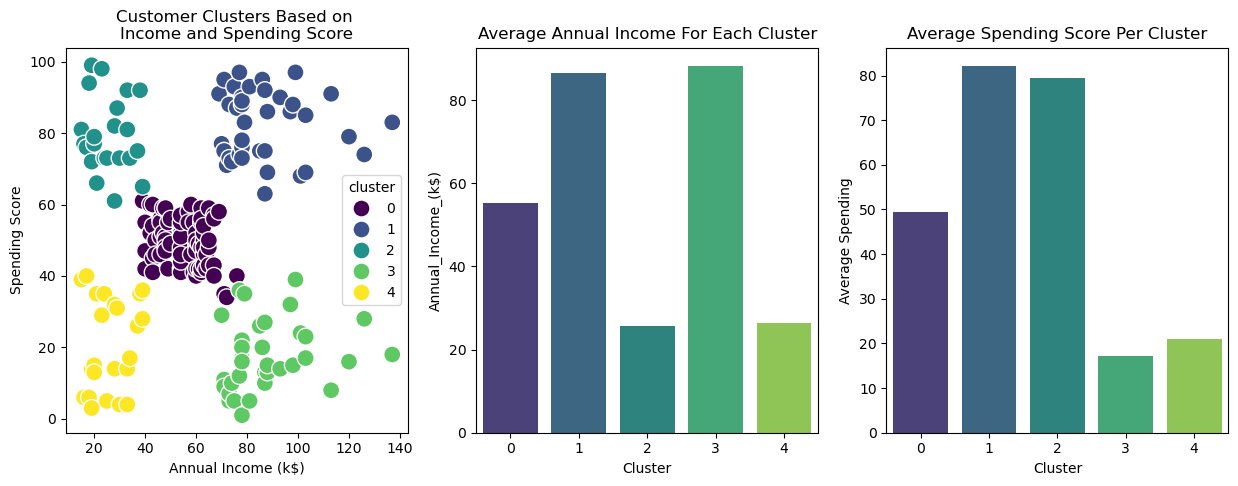

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].set_xlabel("Annual Income (k$)")
axes[0].set_ylabel("Spending Score")
axes[0].set_title("Customer Clusters Based on \nIncome and Spending Score")
axes[0].legend(title="Cluster")
sns.scatterplot(data=X, x="Annual_Income_(k$)", y="Spending_Score", hue="cluster", palette="viridis", s=150, ax=axes[0])

cluster_summary = X.groupby("cluster").agg("mean").reset_index()
sns.barplot(data=cluster_summary, x="cluster", y="Annual_Income_(k$)", palette="viridis", ax=axes[1])
axes[1].set_xlabel("Cluster")
axes[1].set_ylabel("Annual_Income_(k$)")
axes[1].set_title("Average Annual Income For Each Cluster")

sns.barplot(data=cluster_summary, x="cluster", y="Spending_Score", palette="viridis", label=cluster, ax=axes[2])
axes[2].set_xlabel("Cluster")
axes[2].set_ylabel("Average Spending")
axes[2].set_title("Average Spending Score Per Cluster")



plt.show()